## Get the data and print the top 5 records

In [1]:
# import required modules
import pandas as pd

# read data into data frames
views_df = pd.read_csv("data/customer_card_view.csv")

# view the top records from each data frame
print(views_df.head())

   USERID  CARDID                               CARDTITLE  STREAMID  \
0    1007    2798  QUICK TEST - WHAT IS IN MY ENGINE OIL?       561   
1    1007    2798  QUICK TEST - WHAT IS IN MY ENGINE OIL?       561   
2    1007    2798  QUICK TEST - WHAT IS IN MY ENGINE OIL?       561   
3    1007    2808                    ENGINE OIL ADDITIVES       561   
4    1007    2808                    ENGINE OIL ADDITIVES       561   

                    STREAMNAME         TIMESTAMP  MODULEID  \
0  What is engine oil made of?  31-05-2017 01:14       430   
1  What is engine oil made of?  31-05-2017 01:14       430   
2  What is engine oil made of?  31-05-2017 01:14       430   
3  What is engine oil made of?  31-05-2017 01:15       430   
4  What is engine oil made of?  31-05-2017 01:15       430   

                       MODULENAME  
0  2. WHAT IS ENGINE OIL MADE OF?  
1  2. WHAT IS ENGINE OIL MADE OF?  
2  2. WHAT IS ENGINE OIL MADE OF?  
3  2. WHAT IS ENGINE OIL MADE OF?  
4  2. WHAT IS ENGINE

## Process the data

In [3]:
# Generate a pivot table from the views data
content_views_per_user_df = pd.pivot_table(views_df, index = "USERID", columns = "STREAMID", values = "TIMESTAMP", aggfunc="count")

# fill the NA values with 0 - since there are no views for these contents
content_views_per_user_df = content_views_per_user_df.fillna(value = 0)
content_views_per_user_df.to_csv("data/content_views_per_user.csv")

## Visualize the pivot table by seeing the popularity of the contents (by number of total views)

In [4]:
# inline plots in the Jupyter notebook
%matplotlib inline

# import base visalization packages
import matplotlib.pyplot as plt
import numpy as np

# Get the sum along the rows
total_content_views = content_views_per_user_df.sum(axis = 0)
print(total_content_views)

STREAMID
163      1759.0
167       554.0
171       239.0
172       187.0
173       391.0
178      1267.0
179        23.0
184        35.0
185         8.0
186       197.0
188        31.0
189       107.0
190        40.0
191        33.0
192        68.0
198       260.0
199     11931.0
200       450.0
201      3054.0
202       156.0
203      5320.0
204       274.0
205      4270.0
206      3676.0
217        71.0
218     13296.0
219       235.0
220        40.0
223         1.0
228     41961.0
         ...   
1097      754.0
1128       48.0
1201      162.0
1267       56.0
1347       22.0
1381      134.0
1387       21.0
1388       41.0
1389        1.0
1390        3.0
1391        1.0
1392        4.0
1396        4.0
1498       26.0
1499       25.0
1512       88.0
1528      672.0
1633      680.0
1644        6.0
1655        5.0
1657        4.0
1658       19.0
1659       21.0
1660       13.0
1661       13.0
1662       11.0
1665       17.0
1668        5.0
1670       35.0
1677      132.0
Length: 153, dt

In [6]:
# Get the top 5 content ids
top_5_contents = total_content_views.sort_values(ascending = False).head(5)
print(top_5_contents)

STREAMID
228    41961.0
218    13296.0
199    11931.0
238     8541.0
363     7277.0
dtype: float64


([<matplotlib.patches.Wedge at 0x1b01d3d3438>,
 [Text(-0.0190667,1.09983,'228'),
  Text(-0.944669,-0.56356,'218'),
  Text(-0.0858423,-1.09665,'199'),
  Text(0.705861,-0.843659,'238'),
  Text(1.05854,-0.299144,'363')],
 [Text(-0.0104,0.59991,'50.55'),
  Text(-0.515274,-0.307396,'16.02'),
  Text(-0.0468231,-0.59817,'14.37'),
  Text(0.385015,-0.460178,'10.29'),
  Text(0.577387,-0.16317,'8.77')])

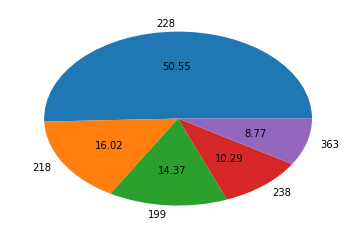

In [7]:
plt.pie(top_5_contents.values, labels = top_5_contents.index, autopct='%.2f')

#### The number of views needs to be normalized for each content and the top contents should still be same

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for column in content_views_per_user_df:
    content_views_per_user_df[column] = scaler.fit_transform(content_views_per_user_df[column])
    
content_views_per_user_df.to_csv("data/content_views_per_user_scaled.csv")
print("File created...")

top_5_contents = total_content_views.sort_values(ascending = False).head(5)
print(top_5_contents)

plt.pie(top_5_contents.values, labels = top_5_contents.index, autopct='%.2f')

ValueError: Expected 2D array, got 1D array instead:
array=[ 1029.    42.   308.    15.   123.   110.     0.     0.    31.     5.
    85.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    11.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.